In [2]:
import pandas as pd

files = [
    'building_sizes_fairbanks.csv',
    'building_sizes_northpole.csv',
    'building_sizes_salcha.csv'
]

# Read and preprocess each file
dataframes = []
for file in files:
    # Load the data from the current file
    df = pd.read_csv(file)
    
    # Filter out rows where 'footprint' is NaN or 0
    df_filtered = df.dropna(subset=['footprint'])
    df_filtered = df_filtered[df_filtered['footprint'] > 0]
    
    # Append the filtered DataFrame to the list
    dataframes.append(df_filtered)

# Concatenate all DataFrames into a single DataFrame
df_combined = pd.concat(dataframes)

# Sort the combined DataFrame by 'footprint' from smallest to largest
df_sorted = df_combined.sort_values(by='footprint')

# Calculate the total number of buildings
total_buildings = len(df_sorted)

print(f'Total number of buildings: {total_buildings}')

Total number of buildings: 24293


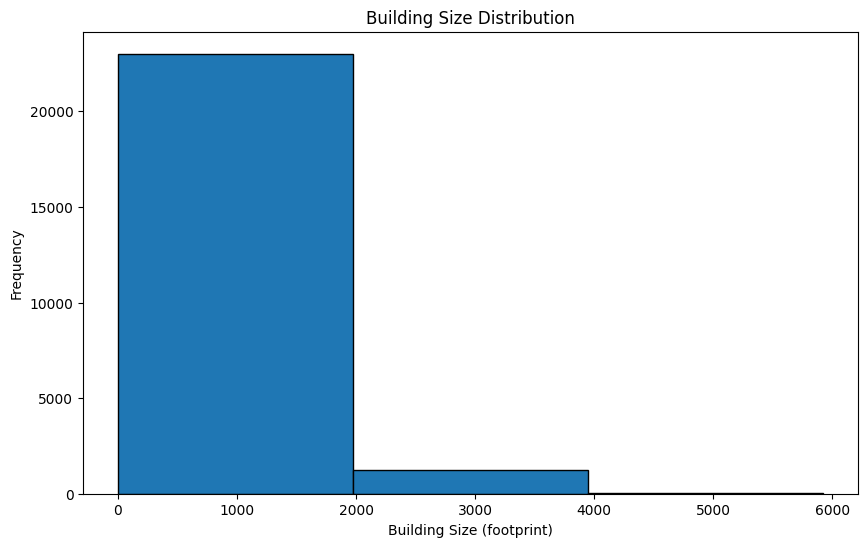

In [3]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_sorted['footprint'], bins=3, edgecolor='black')
plt.title('Building Size Distribution')
plt.xlabel('Building Size (footprint)')
plt.ylabel('Frequency')
plt.show()

In [4]:
import numpy as np

# Calculate histogram and bin edges
counts, bin_edges = np.histogram(df_sorted['footprint'], bins=3)

# Initialize list to store averages
bin_averages = []

for i in range(len(bin_edges)-1):
    # Filter data for this bin
    bin_filter = (df_sorted['footprint'] >= bin_edges[i]) & (df_sorted['footprint'] < bin_edges[i+1])
    bin_data = df_sorted[bin_filter]
    
    # Calculate and store average
    avg = bin_data['footprint'].mean()
    bin_averages.append(avg)

    # Print number of buildings and average size for each bin
    print(f'Bin {i+1}:')
    print(f'  Number of buildings: {counts[i]}')
    print(f'  Average building size: {avg}')

Bin 1:
  Number of buildings: 23016
  Average building size: 1060.591110531804
Bin 2:
  Number of buildings: 1263
  Average building size: 2353.1092636579574
Bin 3:
  Number of buildings: 14
  Average building size: 4605.923076923077


In [5]:
import numpy as np

# Calculate histogram and bin edge using only 1 bin
counts, bin_edges = np.histogram(df_sorted['footprint'], bins=1)

# Initialize list to store averages
bin_averages = []

# Since there is only one bin, calculate average for that bin
# Filter data for this bin
bin_filter = (df_sorted['footprint'] >= bin_edges[0]) & (df_sorted['footprint'] < bin_edges[1])
bin_data = df_sorted[bin_filter]

# Calculate and store average
avg = bin_data['footprint'].mean()
bin_averages.append(avg)

# Print number of buildings and average size for the single bin
print(f'Bin 1:')
print(f'  Number of buildings: {counts[0]}')
print(f'  Average building size: {avg}')

Bin 1:
  Number of buildings: 24293
  Average building size: 1129.6895685822492
